# **Machine learning: the problem setting**
In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data.
If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is
said to have several attributes or features.

We can separate learning problems in a few large categories:

• supervised learning, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:

– classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem   would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided,
one is to try to label them with the correct category or class.

– regression: if the desired output consists of one or more continuous variables, then the task is called
regression. An example of a regression problem would be the prediction of the length of a salmon as a
function of its age and weight.

• unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding
target values. The goal in such problems may be to discover groups of similar examples within the data, where
it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).

we'll learn how to make predictions with scikit-learn. Machine learning emphasizes on measuring the ability to predict, and with scikit-learn we will predict
accurately and quickly. We will examine the iris dataset, which consists of measurements of three types of Iris flowers: Iris Setosa, Iris Versicolor, and Iris Virginica.

A scikit-learn program begins with several imports. Within Python, preferably in Jupyter
Notebook, load the numpy, pandas, and pyplot libraries

Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the training set on which we learn data properties and one that we call the testing set on which we test these properties

## **Loading an example dataset**
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston
house prices dataset for regression


In [1]:
import numpy as np #Load the numpy library for fast array computations
import pandas as pd #Load the pandas data-analysis library
import matplotlib.pyplot as plt #Load the pyplot visualization library
from sklearn import datasets # load the sklearn  library

# loadin the digits and iris datasets

ds_iris = datasets.load_iris()
ds_digits = datasets.load_digits()
print(ds_digits.keys())
print(ds_iris.keys())


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the .data member, which is a n_samples,n_features array. In the case of supervised problem, one or more response variables are stored in the .target member. More details on the different datasets can be found in the dedicated section.

In [2]:

ds = datasets.load_iris()
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

This shows available datasets to load

In [3]:
datasets.load_*?

datasets.load_breast_cancer
datasets.load_diabetes
datasets.load_digits
datasets.load_files
datasets.load_iris
datasets.load_linnerud
datasets.load_sample_image
datasets.load_sample_images
datasets.load_svmlight_file
datasets.load_svmlight_files
datasets.load_wine

In [4]:
import pandas as pd
iris_df = pd.DataFrame(ds.data, columns = ds.feature_names)
#iris_df_target = pd.DataFrame(ds.target, columns = ds.target_names)
print(iris_df)
print(ds.target_names)
# print(ds.data)
print(ds.target[0])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
['setosa' 'versicolor' 'virginica']
0


In [5]:
X = ds.data[:, :2]
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In machine learning, we often deal with data tables and two-dimensional arrays corresponding to examples. In the iris set, we have 150 observations of flowers of three
types. With new observations, we would like to predict which type of flower those observations correspond to. The observations in this case are measurements in centimeters.
It is important to look at the data pertaining to real objects. Quoting my high school physics teacher, "Do not forget the units!"

The iris dataset is intended to be for a supervised machine learning task because it has a target array, which is the variable we desire to predict from the observation variables.
Additionally, it is a classification problem, as there are three numbers we can predict from the observations, one for each type of flower. In a classification problem, we are trying to
distinguish between categories. The simplest case is binary classification. The iris dataset, with three flower categories, is a multi-class classification problem.

There's more...
With the same data, we can rephrase the problem in many ways, or formulate new problems. What if we want to determine relationships between the observations? We can
define the petal width as the target variable. We can rephrase the problem as a regression problem and try to predict the target variable as a real number, not just three categories.
Fundamentally, it comes down to what we intend to predict. Here, we desire to predict a type of flower.

Look at a quick histogram of the values in the dataframe for sepal length:

<Axes: >

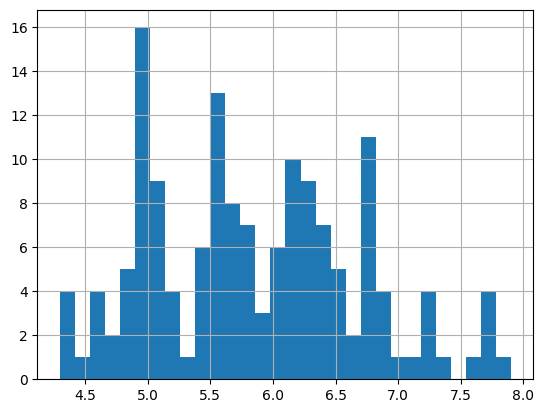

In [6]:
iris_df['sepal length (cm)'].hist(bins=30)

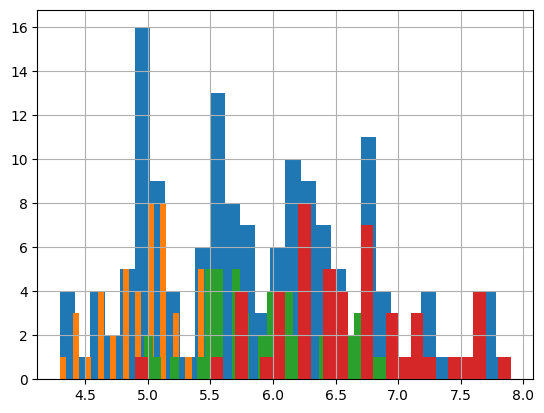

In [7]:

# Look at a quick histogram of the values in the dataframe for sepal length:2.
iris_df['sepal length (cm)'].hist(bins=30)
# You can also color the histogram by the target variable:3.
for class_number in np.unique(ds.target):
    plt.figure(1)
    iris_df['sepal length (cm)'].iloc[np.where(ds.target == class_number)[0]].hist(bins=30)

Observe that the histograms overlap. This encourages us to model the three histograms as three normal distributions. This is possible in a machine learning manner if we model the
training data only as three normal distributions, not the whole set. Then we use the test set to test the three normal distribution models we just made up. Finally, we test the accuracy
of our predictions on the test set.The dataframe data object is a 2D NumPy array with column names and row names. In data science, the fundamental data object looks like a 2D table, possibly because of SQL's long  history. NumPy allows for 3D arrays, cubes, 4D arrays, and so on. These also come up often.

## Plotting with NumPy and matplotlib
A simple way to make visualizations with NumPy is by using the library matplotlib. Let's make some visualizations quickly.The main command in matplotlib, in pseudo code, is as follows:1.
plt.plot(numpy array, numpy array of same length)

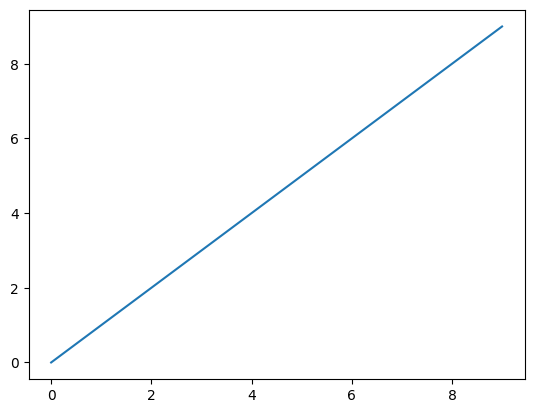

In [8]:
plt.plot(np.arange(10), np.arange(10))

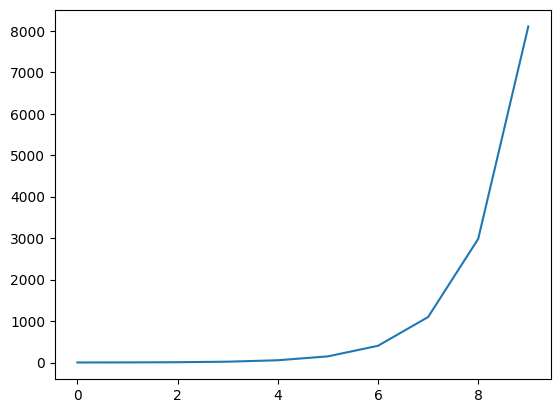

In [9]:
plt.plot(np.arange(10), np.exp(np.arange(10)))

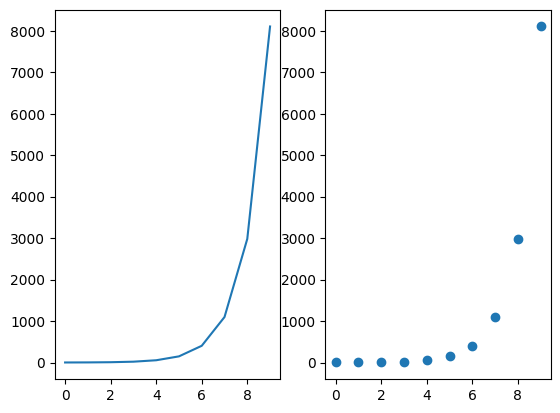

In [10]:
plt.figure()
plt.subplot(121)
plt.plot(np.arange(10), np.exp(np.arange(10)))
plt.subplot(122)
plt.scatter(np.arange(10), np.exp(np.arange(10)))

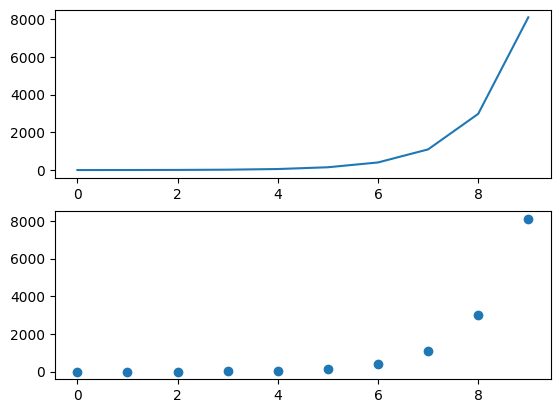

In [11]:
plt.figure()
plt.subplot(211)
plt.plot(np.arange(10), np.exp(np.arange(10)))
plt.subplot(212)
plt.scatter(np.arange(10), np.exp(np.arange(10)))


Or top to bottom:
plt.figure()
plt.subplot(211)
plt.plot(np.arange(10), np.exp(np.arange(10)))
plt.subplot(212)
plt.scatter(np.arange(10), np.exp(np.arange(10)))
The first two numbers in the subplot command refer to the grid size in the figure instantiated by plt.figure(). The grid size referred to in plt.subplot(221) is
2 x 2, the first two digits. The last digit refers to traversing the grid in reading order: left to right and then up to down.